In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam


**Creating our CNN Model**

In [2]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 1, activation = 'sigmoid'))

**Compiling our Model**

In [3]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 0.0001), metrics = ['accuracy'])

In [4]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

**Generator Training and Validation Dataset**

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#Here we will use Image Augmentation on training set only
train_datagen = ImageDataGenerator(rescale = 1/256,
                                  rotation_range = 30,
                                  shear_range = 0.2,
                                  zoom_range = 0.3,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')
training_set = train_datagen.flow_from_directory("train/", target_size = (256,256), batch_size = 2, class_mode = 'binary')

validation_datagen = ImageDataGenerator(rescale = 1/256)
validation_data = validation_datagen.flow_from_directory("test/", target_size = (256,256), batch_size = 2, class_mode = 'binary')

Found 204 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


**Creating callbacks**

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.125, patience = 2, min_lr = 0.00001, model = 'auto')
callbacks = [reduce_lr]

**Training our Model**

In [8]:
steps_per_epoch = training_set.n//training_set.batch_size
validation_steps = validation_data.n//validation_data.batch_size

history = model.fit(training_set,steps_per_epoch = steps_per_epoch, epochs = 25, validation_data = validation_data, validation_steps = validation_steps, callbacks = callbacks)

Epoch 1/25
102/102 [==============================] - 24s 239ms/step - loss: 0.6933 - accuracy: 0.5196 - val_loss: 0.6729 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/25
102/102 [==============================] - 24s 235ms/step - loss: 0.6734 - accuracy: 0.6078 - val_loss: 0.5281 - val_accuracy: 0.9167 - lr: 1.0000e-04
Epoch 3/25
102/102 [==============================] - 25s 241ms/step - loss: 0.5798 - accuracy: 0.6912 - val_loss: 0.3698 - val_accuracy: 0.8667 - lr: 1.0000e-04
Epoch 4/25
102/102 [==============================] - 24s 233ms/step - loss: 0.5604 - accuracy: 0.7353 - val_loss: 0.2070 - val_accuracy: 0.9833 - lr: 1.0000e-04
Epoch 5/25
102/102 [==============================] - 25s 247ms/step - loss: 0.4673 - accuracy: 0.7794 - val_loss: 0.1951 - val_accuracy: 0.9333 - lr: 1.0000e-04
Epoch 6/25
102/102 [==============================] - 24s 237ms/step - loss: 0.4085 - accuracy: 0.8235 - val_loss: 0.1051 - val_accuracy: 0.9667 - lr: 1.0000e-04
Epoch 7/25
102/102 [========

**Plotting accuracy and Loss or both training and validation set**

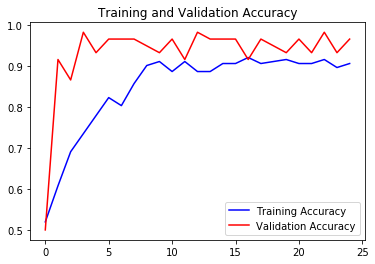

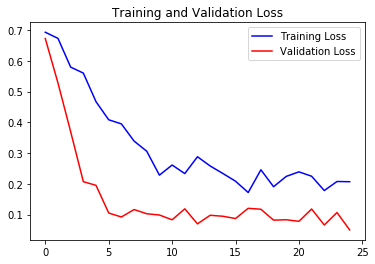

In [9]:
import matplotlib.pyplot as plt

train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(train_acc))

plt.plot(epochs, train_acc, c = 'blue', label = "Training Accuracy")
plt.plot(epochs, val_acc, c = 'red', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, c = 'blue', label = "Training Loss")
plt.plot(epochs, val_loss, c = 'red', label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()